In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [5]:
data=pd.read_csv('Movie_Review.csv')

data = data.rename(columns={'text ': 'text', 'sentiment ': 'sentiment'})
data

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
495,"""American Nightmare"" is officially tied, in my...",negative
496,"First off, I have to say that I loved the book...",negative
497,This movie was extremely boring. I only laughe...,negative
498,I was disgusted by this movie. No it wasn't be...,negative


In [6]:
data['sentiment'].value_counts()

sentiment
negative    263
positive    237
Name: count, dtype: int64

In [7]:
data.dropna(inplace=True)



In [43]:
# Make sure your training data is properly preprocessed
def preprocess_text(text):
    if isinstance(text, np.ndarray):
        text = ' '.join(text.astype(str))
    elif pd.isna(text):
        text = ''
    else:
        text = str(text)
    return text

# Apply this before training
data['text'] = data['text'].apply(preprocess_text)

In [42]:
# Check what's in the text column
print("Data types in 'text' column:")
print(data['text'].apply(type).value_counts())

# Convert any arrays to strings
def convert_to_string(text):
    if isinstance(text, np.ndarray):
        return ' '.join(text.astype(str))
    elif not isinstance(text, str):
        return str(text)
    else:
        return text

# Apply conversion first
data['text'] = data['text'].apply(convert_to_string)

# Now apply your cleaning function
def clean_review(review):
    cleaned_text = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return cleaned_text

data['text'] = data['text'].apply(clean_review)

Data types in 'text' column:
text
<class 'str'>    500
Name: count, dtype: int64


In [ ]:
data['text']=data['text'].apply(clean_review)

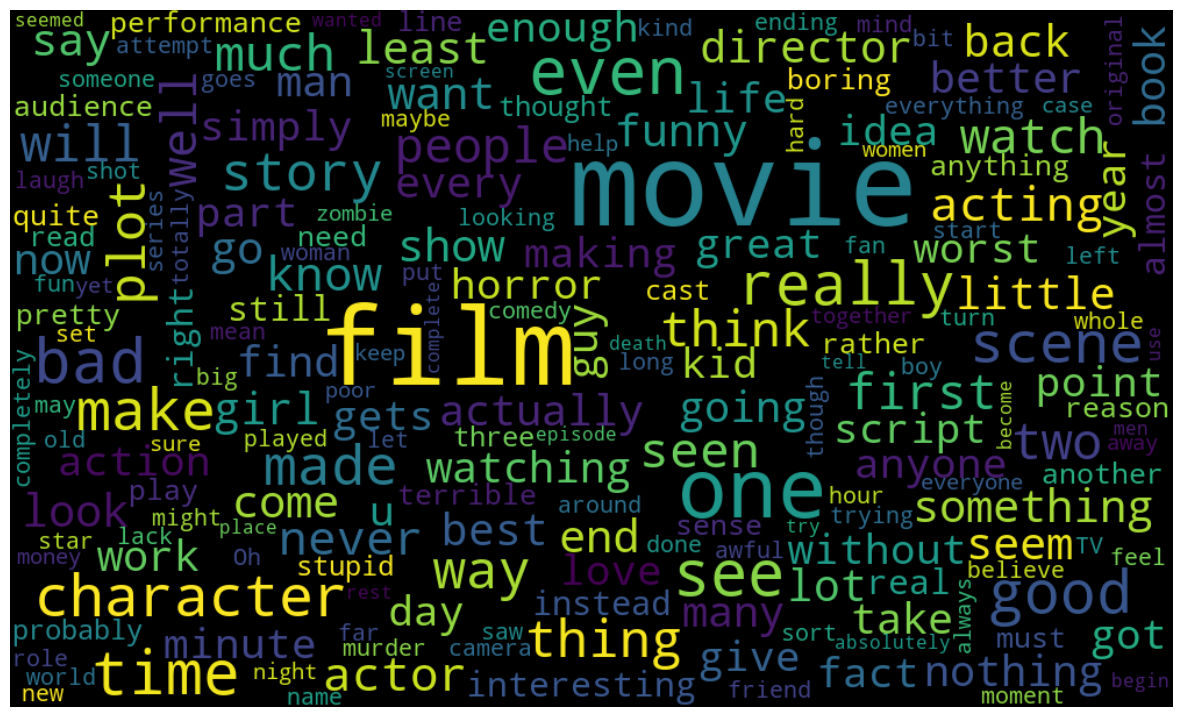

In [8]:
# Replace 'your_column_name' with the actual column name
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = ' '.join(word for word in data['text'][data['sentiment']=='negative'].astype(str))
wordcloud = WordCloud(height=600, width=1000, max_font_size=100)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

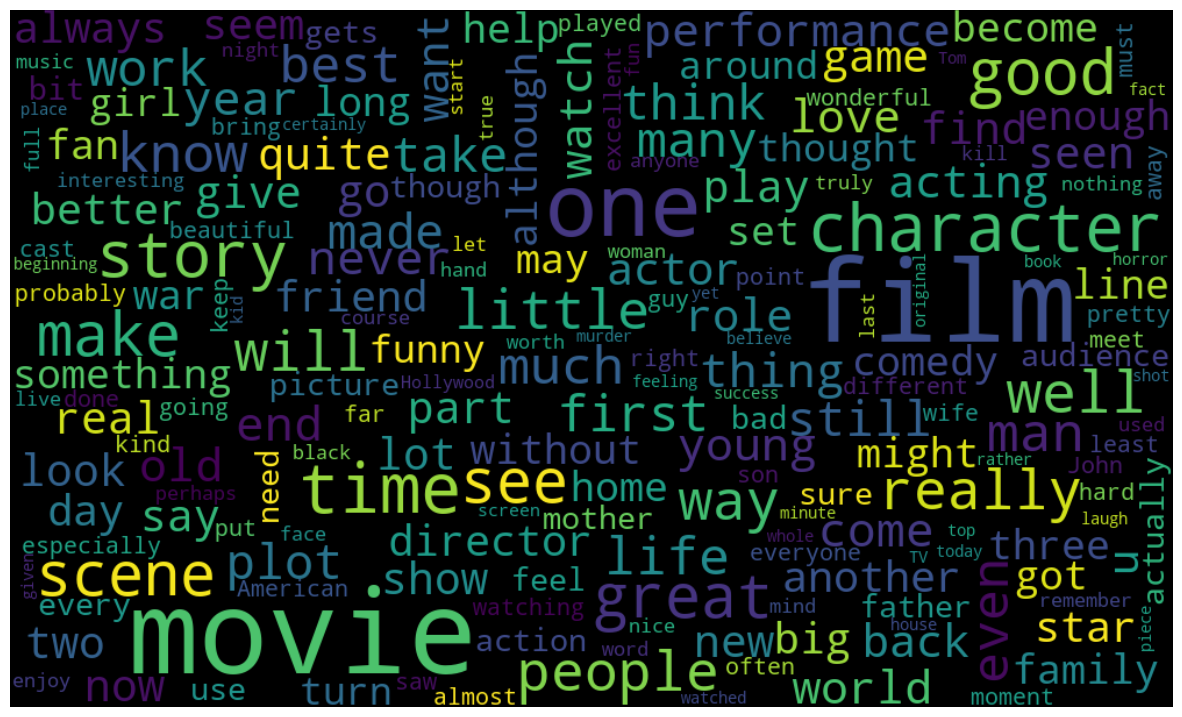

In [11]:
reviews=' '.join(word for word in data['text'][data['sentiment']=='positive'].astype(str))
wordcloud = WordCloud(height=600, width=1000, max_font_size=100)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=2500)

In [ ]:
reviews=cv.fit_transformers(data['text']).toarray()

In [13]:
data['sentiment']=data['sentiment'].replace(['positive','negative'],[1,0])
data['sentiment'].value_counts()

C:\Users\malya\AppData\Local\Temp\ipykernel_18860\1239385384.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment']=data['sentiment'].replace(['positive','negative'],[1,0])


sentiment
0    263
1    237
Name: count, dtype: int64

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model=LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
reviews_train, reviews_test, sent_train, sent_test = train_test_split(
    data['text'], 
    data['sentiment'], 
    test_size=0.2,
    random_state=42)

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a pipeline with proper preprocessing
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', LogisticRegression())
])

# Train on properly preprocessed data
pipeline.fit(data['text'], data['sentiment'])



,steps,"[('tfidf', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [32]:
predict=model.predict(reviews_test)

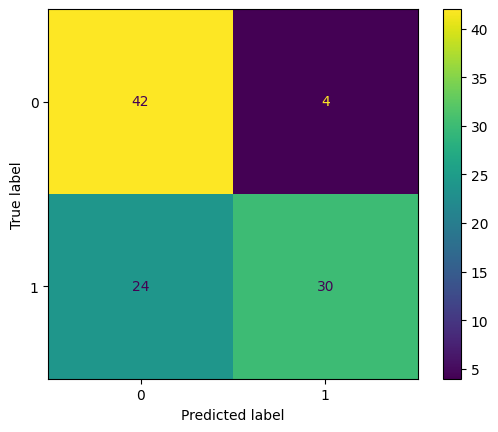

In [34]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(sent_test,predict,labels=model.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

In [45]:
import pickle as pk

pk.dump(model,open('model.pkl','wb'))
pk.dump(pipeline, open('pipeline.pkl', 'wb'))

In [40]:
vectorizer = model.named_steps['tfidf']
pk.dump(vectorizer, open('vectorizer.pkl', 'wb'))
        